c:\Users\sanan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


SGD Model Accuracy: 0.9778
Adam Model Accuracy: 0.9833


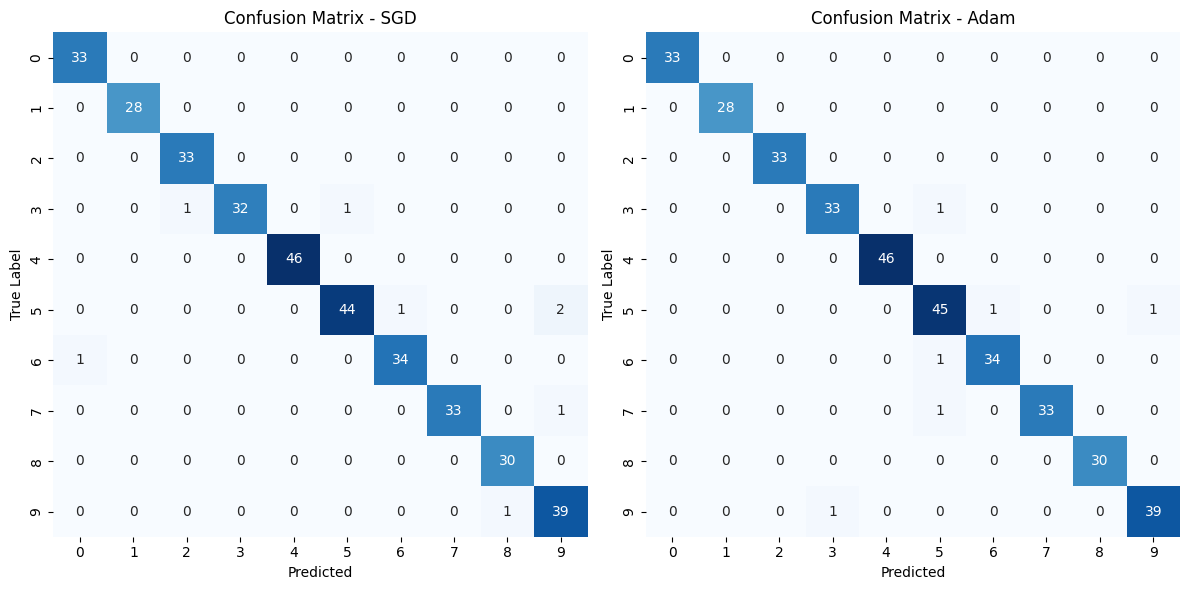

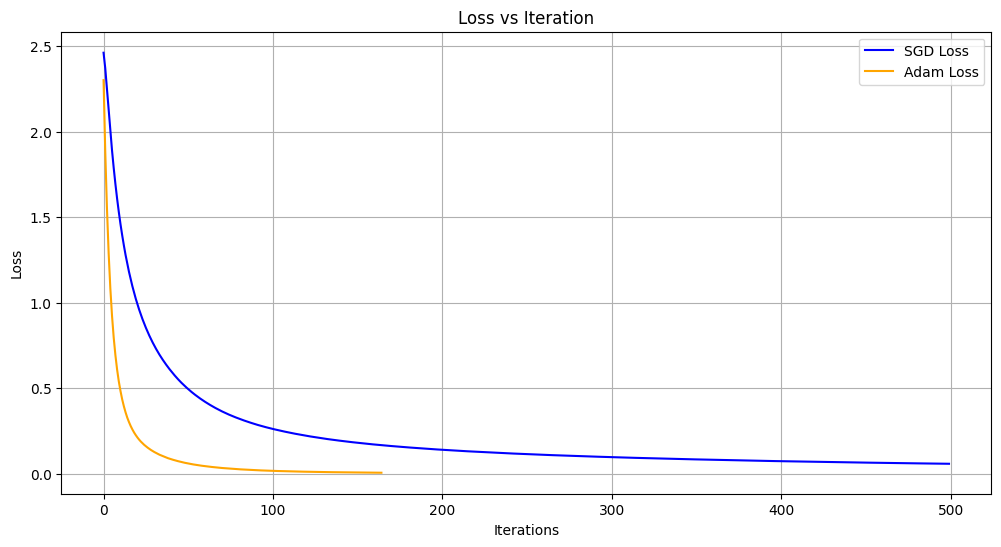

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier

# Load the digits dataset
digits = datasets.load_digits()
X, y = digits.data, digits.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Custom MLPClassifier to track loss
class MLPClassifierWithLoss(MLPClassifier):
    def fit(self, X, y):
        self.loss_curve_ = []  # To store loss values
        return super().fit(X, y)

    def _update_loss(self):
        # Override the update loss method to collect loss values
        if hasattr(self, 'loss_curve_'):
            self.loss_curve_.append(self.loss_)

# Define a function to train the model with different optimizers and track losses
def train_model(optimizer):
    model = MLPClassifierWithLoss(hidden_layer_sizes=(64,), max_iter=500, solver=optimizer, random_state=42, verbose=False)
    model.fit(X_train, y_train)
    return model

# Train with SGD
sgd_model = train_model('sgd')

# Train with Adam
adam_model = train_model('adam')

# Evaluate the models
sgd_accuracy = sgd_model.score(X_test, y_test)
adam_accuracy = adam_model.score(X_test, y_test)

print(f"SGD Model Accuracy: {sgd_accuracy:.4f}")
print(f"Adam Model Accuracy: {adam_accuracy:.4f}")

# Create a confusion matrix for both models
sgd_y_pred = sgd_model.predict(X_test)
adam_y_pred = adam_model.predict(X_test)

sgd_cm = confusion_matrix(y_test, sgd_y_pred)
adam_cm = confusion_matrix(y_test, adam_y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(sgd_cm, annot=True, fmt='d', ax=axes[0], cmap='Blues', cbar=False)
axes[0].set_title('Confusion Matrix - SGD')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True Label')

sns.heatmap(adam_cm, annot=True, fmt='d', ax=axes[1], cmap='Blues', cbar=False)
axes[1].set_title('Confusion Matrix - Adam')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Plot loss curves for both optimizers
plt.figure(figsize=(12, 6))
plt.plot(sgd_model.loss_curve_, label='SGD Loss', color='blue')
plt.plot(adam_model.loss_curve_, label='Adam Loss', color='orange')
plt.title('Loss vs Iteration')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()
